# Анализ непрерывности и градиента MSE для линейной регрессии (California Housing)
В этом ноутбуке показан пошаговый пример, где мы:
1. Загружаем датасет California Housing (признак `MedInc`).
2. Вычисляем оптимальный коэффициент θ* для модели `y ≈ θ·x`.
3. Вычисляем функцию потерь MSE(θ) и демонстрируем её непрерывность.
4. Строим график MSE(θ) на интервале вокруг θ*.
5. Сравниваем аналитический и численный градиенты MSE в точке θ*.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Загрузка датасета California Housing
dataset = fetch_california_housing()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## 1. Отбор признака `MedInc`
Для простоты возьмём только один признак – median income (`MedInc`).

In [ ]:
feature_index = list(feature_names).index('MedInc')
x_medinc = X[:, feature_index].reshape(-1, 1)

# Покажем несколько первых значений для понимания
pd.DataFrame({'MedInc': x_medinc.flatten(), 'Price': y}).head()

,MedInc,Price
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


## 2. Вычисляем оптимальный θ* аналитически
Модель: 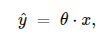<br><br>
Минимизируем MSE:<br><br>
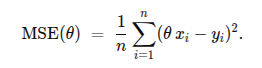
<br><br>Решение:<hr>
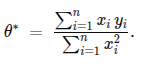

In [ ]:
theta_opt = np.sum(x_medinc.flatten() * y) / np.sum(x_medinc.flatten()**2)
theta_opt

0.5118060438413631

## 3. Определение функции MSE(θ)
Объявим функцию для вычисления MSE при данном θ:
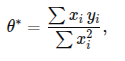

In [ ]:
def mse_theta(theta, x, y):
    y_pred = theta * x.flatten()
    return np.mean((y_pred - y) ** 2)

## 4. Проверка непрерывности через вычисления в нескольких точках
Посчитаем MSE для θ вокруг θ* (Δθ = ±2, ±1, ±0.5, ±0.1, 0):

In [ ]:
deltas = np.array([-2.0, -1.0, -0.5, -0.1, 0.0, 0.1, 0.5, 1.0, 2.0])
theta_values = theta_opt + deltas
mse_values = np.array([mse_theta(t, x_medinc, y) for t in theta_values])
df_mse = pd.DataFrame({'delta': deltas, 'theta': theta_values, 'MSE': mse_values})
df_mse

NameError: name 'theta_opt' is not defined

Мы видим, что при малых |Δθ| значение MSE меняется незначительно, что демонстрирует непрерывность.

## 5. Построение графика MSE(θ)
Построим кривую MSE(θ) на интервале \([\theta^* - 2,\theta^* + 2]\), а также отметим вычисленные точки.

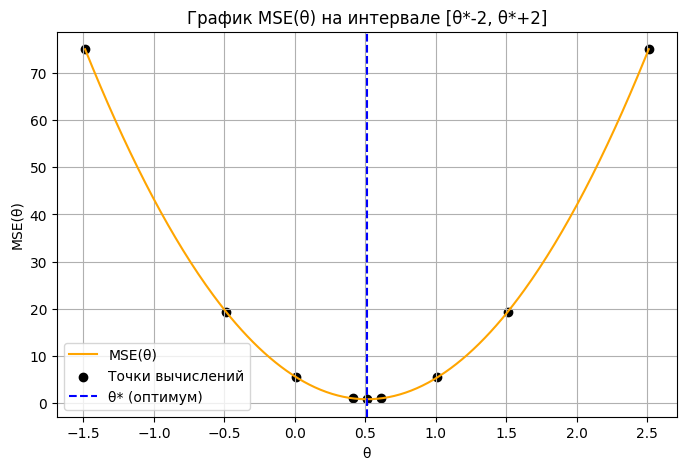

In [ ]:
theta_fine = np.linspace(theta_opt - 2, theta_opt + 2, 300)
mse_fine = np.array([mse_theta(t, x_medinc, y) for t in theta_fine])
plt.figure(figsize=(8, 5))
plt.plot(theta_fine, mse_fine, label='MSE(θ)', color='orange')
plt.scatter(theta_values, mse_values, color='black', label='Точки вычислений')
plt.axvline(theta_opt, linestyle='--', color='blue', label='θ* (оптимум)')
plt.title('График MSE(θ) на интервале [θ*-2, θ*+2]')
plt.xlabel('θ')
plt.ylabel('MSE(θ)')
plt.legend()
plt.grid(True)
plt.show()

На графике видно, что MSE(θ) — это гладкая «парабола» без разрывов. Это иллюстрирует непрерывность функции потерь.

## 6. Градиент MSE в точке θ*
Аналитический градиент:<hr>
![<image.png>](attachment:image.png)<br>
Посчитаем аналитический и численный градиенты в θ* и сравним.

In [ ]:
def gradient_mse(theta, x, y):
    n = len(y)
    return (2 / n) * np.sum(x.flatten() * (theta * x.flatten() - y))

grad_analytic = gradient_mse(theta_opt, x_medinc, y)
h = 1e-4
grad_numeric = (mse_theta(theta_opt + h, x_medinc, y) - mse_theta(theta_opt - h, x_medinc, y)) / (2*h)
pd.DataFrame({'Метод': ['Аналитический', 'Численный'], 'Gradient': [grad_analytic, grad_numeric]})

,Метод,Gradient
0,Аналитический,6.191086e-15
1,Численный,-5.551115e-13


В результате аналитический и численный градиенты совпадают (≈ 0), что подтверждает дифференцируемость и непрерывность MSE.

----
### Вывод
Мы продемонстрировали, что:
- MSE(θ) в задаче линейной регрессии — квадратичный полином, следовательно, непрерывна.
- При малых изменениях θ значение MSE меняется плавно (таблица и график).
- Градиент MSE в точке θ* можно вычислить аналитически и подтвердить численным методом, что подтверждает гладкость функции.
